> ## 从零开始构建三层神经网络分类器，实现图像分类实验报告 
- github repo链接 <https://github.com/Leeson625/HW-1.git>
- 模型权重的下载地址 <https://pan.baidu.com/s/17p2dnStnNku9uQ5xclpxaw> 提取码：gwnz
 






### 一、数据加载与可视化

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义的读取数据的函数
from Fashion_MNIST.Fashion_MNIST import load_mnist
from common.util import shuffle_dataset

# 三层神经网络的类
from common.multi_layer_net import MultiLayerNet
# 训练过程的类
from common.trainer import Trainer


Fashion-MNIST由10个类别的图像组成，
每个类别由*训练数据集*（train dataset）中的6000张图像
和*测试数据集*（test dataset）中的1000张图像组成。
因此，训练集和测试集分别包含60000和10000张图像。
测试数据集不会用于训练，只用于评估模型性能。

Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。
以下函数用于在数字标签索引及其文本名称之间进行转换。

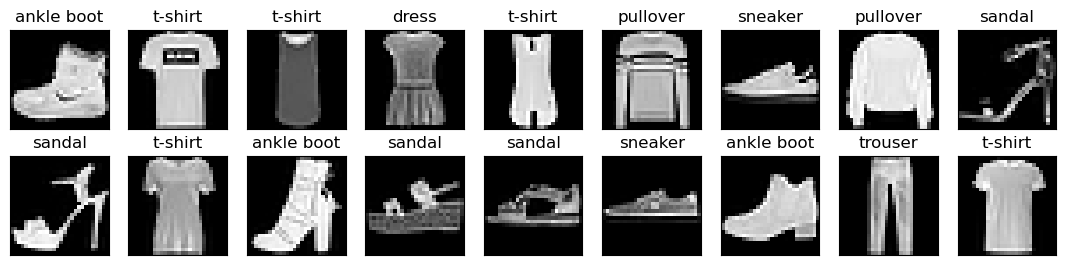

In [2]:
# 读取数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, flatten=False)
# 数据集可视化
def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img, cmap='gray')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])

# 选择显示的图像数量
num_images = 18
# 准备图像和标签
imgs = x_train[:num_images].reshape(-1, 28, 28)  # 将图像重塑为 (28, 28)
labels = get_fashion_mnist_labels(t_train[:num_images])
# 显示图像
show_images(imgs, 2, 9, titles=labels)
plt.show()

### 二、参数查找

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了实现高速化，减少训练数据
x_train = x_train[:1000]
t_train = t_train[:1000]
# 分割验证数据
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

* *调节学习率、正则化强度等超参数，随机选取一定数据进行参数查找实验，观察并记录模型在不同超参数下的性能*

In [4]:
def hyperparameter_search(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[128, 64, 32],
                            output_size=10, weight_decay_lambda=weight_decay)   # 三个隐藏层的神经网络
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,                   
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)  # 使用SGD优化器
    trainer.train()

    return trainer.val_acc_list, trainer.train_acc_list

# 超参数的随机搜索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 指定搜索的超参数的范围===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = hyperparameter_search(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list 

val acc:0.69 | lr:0.0038157823842838853, weight decay:6.139867467984725e-07
val acc:0.1 | lr:8.907218596168591e-05, weight decay:1.1495918610995728e-07
val acc:0.11 | lr:4.613276067502126e-06, weight decay:8.413735701302793e-07
val acc:0.3 | lr:0.000248939936852077, weight decay:2.8272420193786414e-06
val acc:0.235 | lr:5.46935128033157e-06, weight decay:7.6990190945248e-07
val acc:0.115 | lr:0.00015104790461804087, weight decay:4.376891808213108e-07
val acc:0.495 | lr:0.0008206752487232174, weight decay:2.452945009494919e-07
val acc:0.08 | lr:0.00012206799934538571, weight decay:1.9181213239974497e-07
val acc:0.255 | lr:0.0002920319856241075, weight decay:2.229171453437073e-06
val acc:0.615 | lr:0.00209027285147373, weight decay:1.5000019280508997e-07
val acc:0.65 | lr:0.0038239827108707347, weight decay:8.607259087498658e-08
val acc:0.665 | lr:0.003359690217558654, weight decay:7.148308234610503e-08
val acc:0.14 | lr:2.546368963104402e-06, weight decay:1.265501770736415e-05
val acc:0

=========== Hyper-Parameter Optimization Result ===========


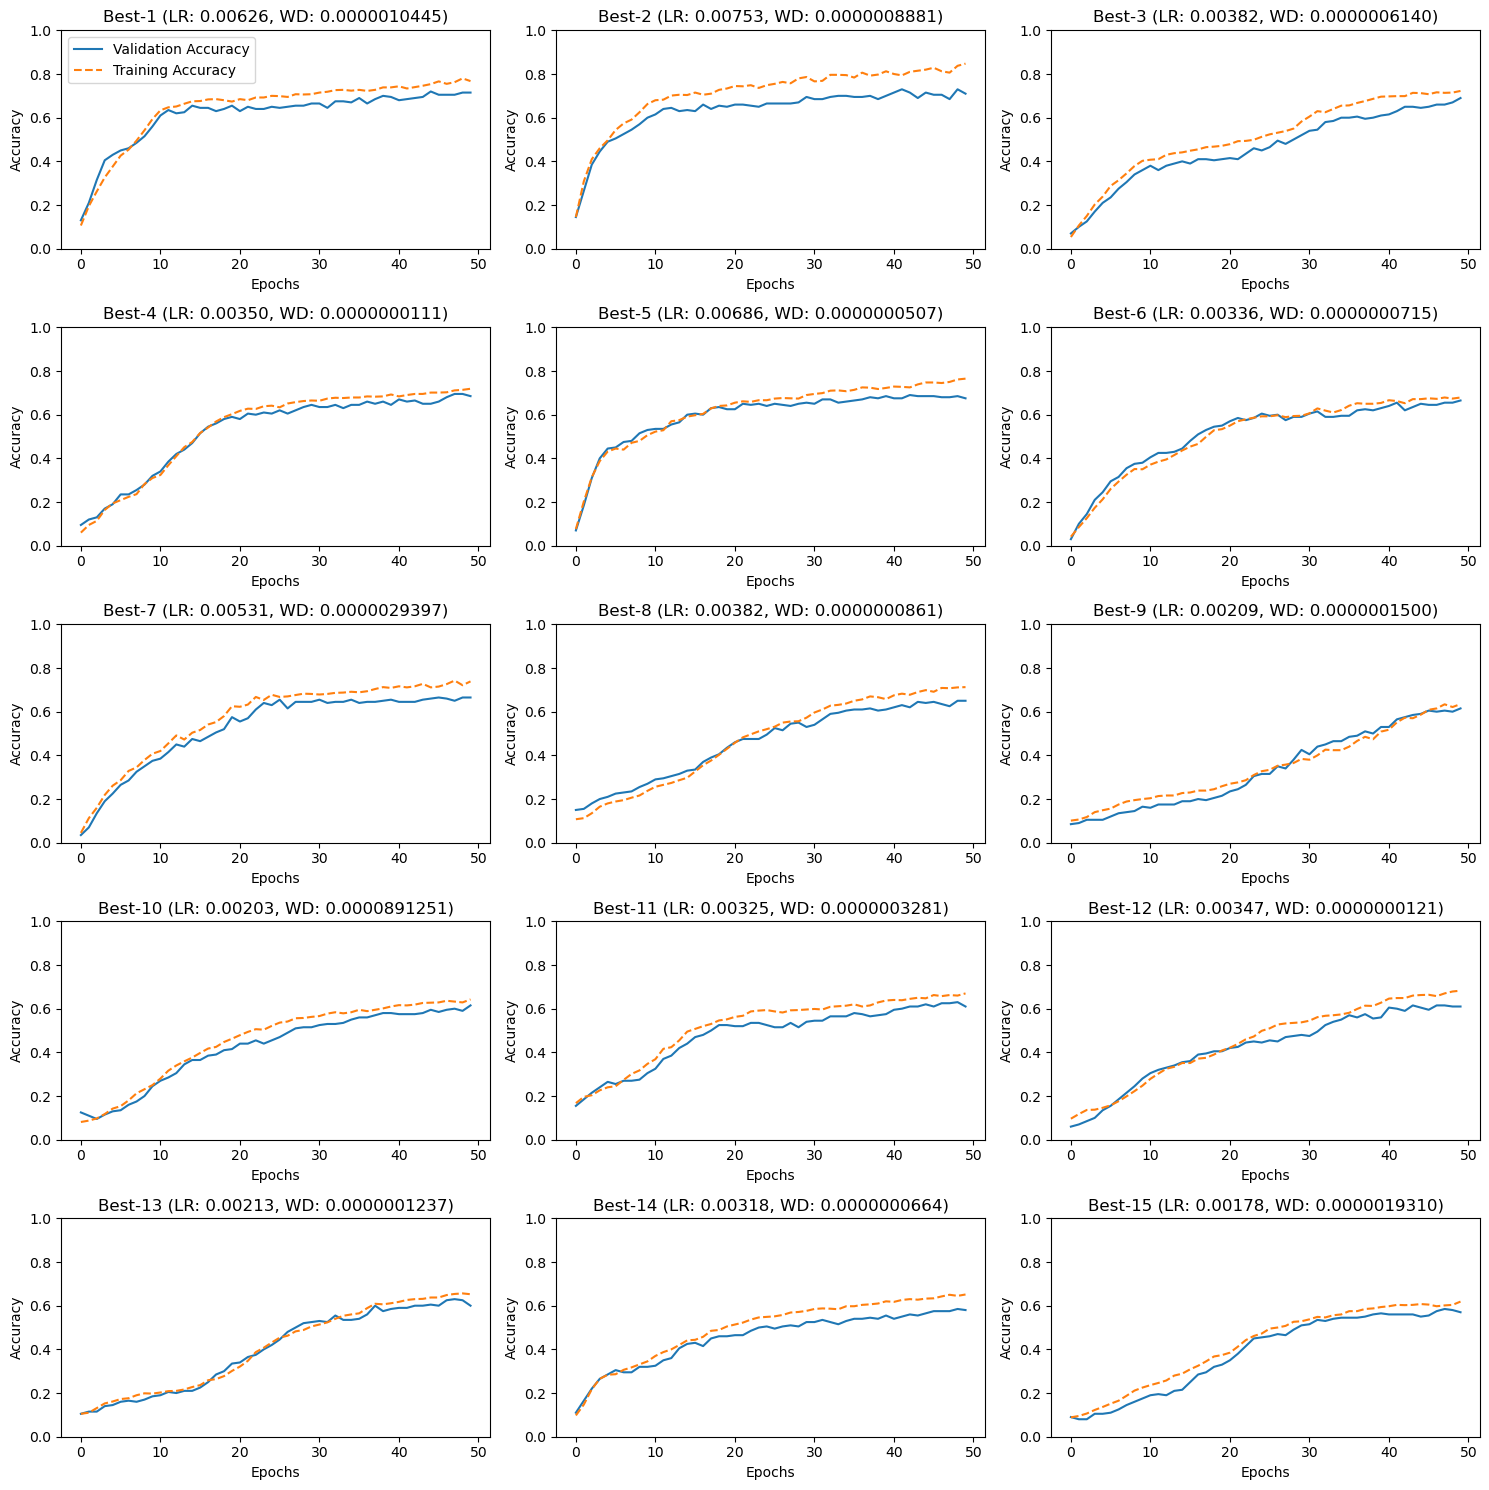

In [5]:
# 绘制图形========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
# 绘制图形设置
graph_draw_num = 15  # 总共绘制的图表数
col_num = 3  # 每行显示的图表数
row_num = 5  # 行数
fig, axs = plt.subplots(row_num, col_num, figsize=(15, 15))  # 总体图表大小为15x15英寸

i = 0  # 计数器，跟踪当前正在绘制的图表编号

# 遍历排序后的结果，并绘制图表
for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    if i < graph_draw_num:
        ax = axs[i // col_num, i % col_num]  # 定位当前的子图
        # 从key中提取超参数值
        parts = key.replace('lr:', '').replace('weight decay:', '').split(', ')
        lr = float(parts[0])  # 转换为浮点数
        weight_decay = float(parts[1])  # 转换为浮点数
        title = f"Best-{i+1} (LR: {lr:.5f}, WD: {weight_decay:.10f})"
        ax.set_title(title)  # 设置标题
        ax.set_ylim(0.0, 1.0)  # 设置Y轴的范围
        ax.set_xlabel('Epochs')  # 设置X轴标签
        ax.set_ylabel('Accuracy')  # 设置Y轴标签
        x = np.arange(len(val_acc_list))  # 创建x轴的标记（基于列表长度）
        ax.plot(x, val_acc_list, label='Validation Accuracy')  # 绘制验证集准确率曲线
        ax.plot(x, results_train[key], "--", label='Training Accuracy')  # 绘制训练集准确率曲线
        if i == 0:  # 只在第一个图表中显示图例
            ax.legend()
        i += 1

plt.tight_layout()  # 调整子图间的间隔以避免重叠
plt.show()

* *从结果中可以看出，学习率在0.001到0.01之间，权值衰减系数在 $10^{-8}$到$10^{-6}$之间时，学习可以顺利进行。下面我们以学习率为0.01，权值衰减系数为0.000001进行训练。*

### 三、进行模型训练

* *我们建立三层隐藏层的神经网络模型，输入大小（MNIST数据集为784），隐藏层的神经元数量的列表为（[100, 64, 32]），依次递减，输出大小为10（MNIST数据集为10分类情形）。激活函数为relu，且初始值为He的初始值，此时具有较好的效果。训练过程选择的是Adam优化器，融合了Momentum和AdaGrad的优点，且能够根据验证集指标自动保存最优的模型权重。学习率和权重衰减系数分别为上面参数查找中选取的初始值。*

In [6]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 分割20%的验证数据
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

network = MultiLayerNet(input_size=784, hidden_size_list=[128, 64, 32],output_size=10, 
                        activation='relu', weight_init_std='he',  # 使用ReLU激活函数和He初始值
                        weight_decay_lambda=0.000001)
trainer = Trainer(network, x_train, t_train, x_val, t_val,
                  epochs=20, mini_batch_size=100,
                  # 选用Adam优化器，融合了Momentum和AdaGrad的优点
                  optimizer='adam', optimizer_param={'lr':0.01}, 
                  verbose=True, save_model=True)
trainer.train()

=== epoch:1, train acc:0.25708333333333333, val acc:0.2529166666666667 ===
Saved Best Model.
=== epoch:2, train acc:0.8461458333333334, val acc:0.8431666666666666 ===
Saved Best Model.
=== epoch:3, train acc:0.855375, val acc:0.8483333333333334 ===
Saved Best Model.
=== epoch:4, train acc:0.8664791666666667, val acc:0.85575 ===
Saved Best Model.
=== epoch:5, train acc:0.8720833333333333, val acc:0.8585 ===
Saved Best Model.
=== epoch:6, train acc:0.8673333333333333, val acc:0.8493333333333334 ===
=== epoch:7, train acc:0.8749583333333333, val acc:0.8585 ===
=== epoch:8, train acc:0.8827916666666666, val acc:0.8645 ===
Saved Best Model.
=== epoch:9, train acc:0.8827083333333333, val acc:0.8675833333333334 ===
Saved Best Model.
=== epoch:10, train acc:0.8869791666666667, val acc:0.8664166666666666 ===
=== epoch:11, train acc:0.8903958333333334, val acc:0.8713333333333333 ===
Saved Best Model.
=== epoch:12, train acc:0.8874375, val acc:0.87075 ===
=== epoch:13, train acc:0.899145833333333

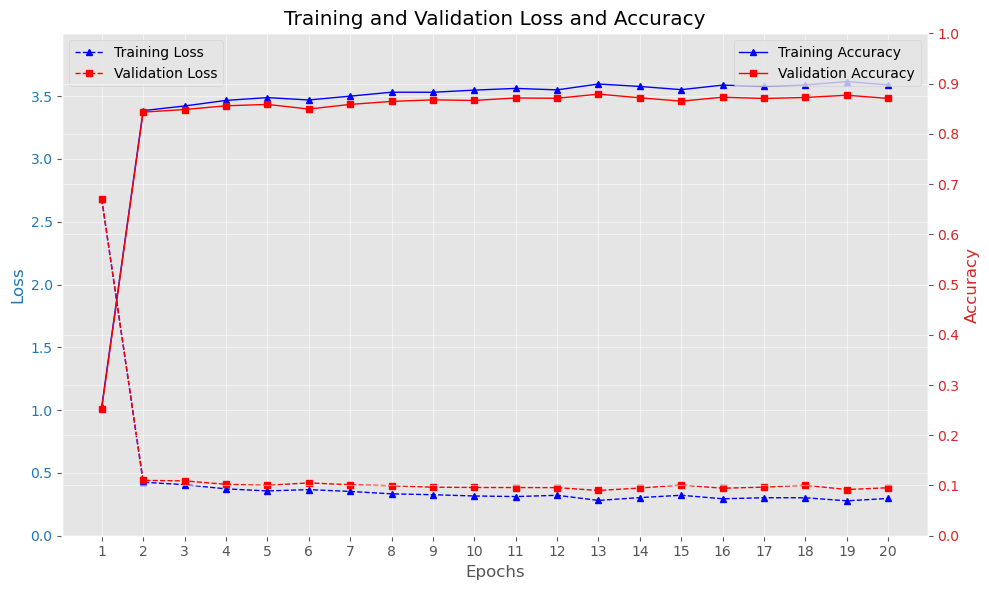

In [7]:
# 使用 ggplot 风格
plt.style.use('ggplot')

# 设置图形大小
fig, ax1 = plt.subplots(figsize=(10, 6))

# 设置横坐标为整数
epochs = np.arange(1, len(trainer.train_loss_list) + 1)
ax1.set_xticks(epochs)  # 确保x轴标签显示为整数

# 绘制损失曲线，使用ax1
ax1.plot(epochs, trainer.train_loss_list, 'b--^', label='Training Loss',  markersize=5, linewidth=1)  # 蓝色线条，三角标记
ax1.plot(epochs, trainer.val_loss_list, 'r--s', label='Validation Loss', markersize=5, linewidth=1)  # 绿色线条，方块标记
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(0, 4)  # 设置Loss轴的范围，根据需要调整
ax1.set_yticks(np.arange(0, 4, 0.5))  # 设置更细的y轴刻度
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.5)  # 显示网格，透明度为0.2

# 创建共享x轴但不同y轴的图表
ax2 = ax1.twinx()  # 使用相同的x轴
ax2.plot(epochs, trainer.train_acc_list, 'b-^', label='Training Accuracy',  markersize=5, linewidth=1)  # 红色线条，三角标记
ax2.plot(epochs, trainer.val_acc_list, 'r-s', label='Validation Accuracy',  markersize=5, linewidth=1)  # 青色线条，方块标记
ax2.set_ylabel('Accuracy', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 1)  # 确保Accuracy轴的范围是0到1
ax2.set_yticks(np.arange(0, 1.1, 0.1))  # 设置更细的y轴刻度
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.5) 

# 设置标题和网格
plt.title('Training and Validation Loss and Accuracy')

# 调整图表边缘空白，显示图形
plt.tight_layout()
plt.show()

### 四、模型参数的可视化，输出在测试集上的分类准确率（Accuracy）

#### 4.1 模型参数的可视化

* *通过对Fashion-MNIST数据集进行全连接层的学习，第一层权重W1的维度是(784, 128)，有128个权重向量，每个向量长度为784。这些权重向量可以被重塑为28x28的图像（因为$28*28 = 784$），这是标准的MNIST图像尺寸。这样可以将每个向量视为一个在MNIST数据集上学习到的特征。*

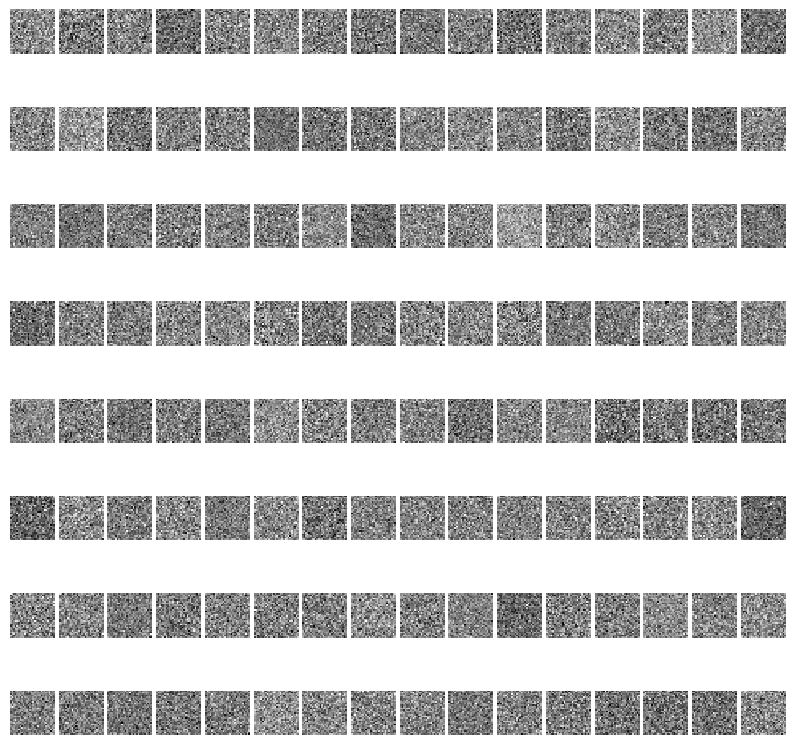

In [8]:
def plot_weights(W, cols=16, figsize=(10, 10)):
    # 确定行数
    num_filters = W.shape[1]
    num_rows = (num_filters + cols - 1) // cols
    
    # 设置绘图大小
    fig, axes = plt.subplots(num_rows, cols, figsize=figsize,
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            # 将权重向量重塑为28x28的图像
            img = W[:, i].reshape(28, 28)
            # 权重图像使用灰度色彩映射
            ax.imshow(img, cmap='gray', interpolation='nearest')
        ax.axis('off')


network = MultiLayerNet(input_size=784, hidden_size_list=[128, 64, 32],output_size=10)
# 随机进行初始化后的权重
plot_weights(network.params['W1'])

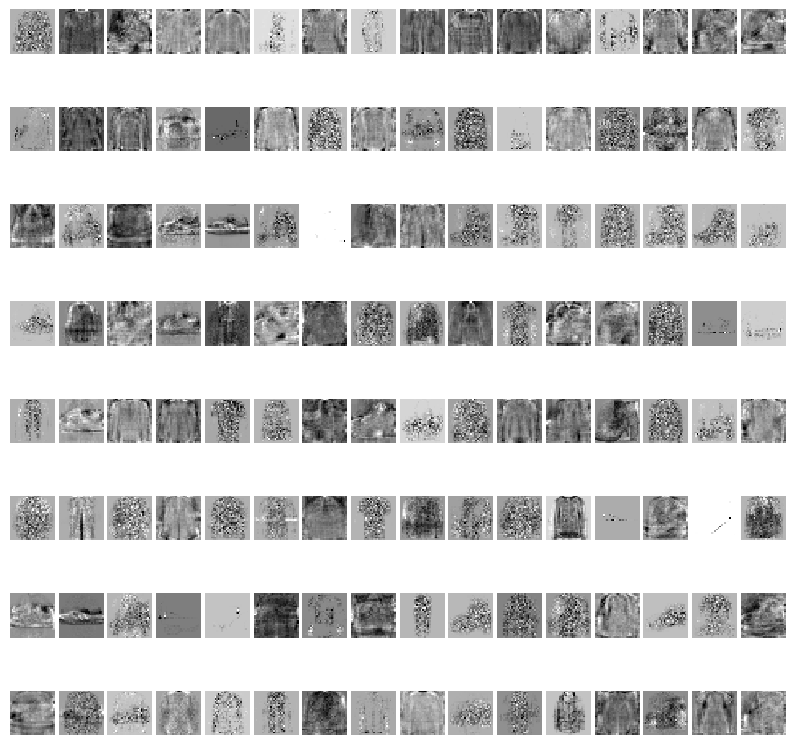

In [9]:
# 学习后的权重
network.load_params("best_model.pkl")
plot_weights(network.params['W1'])

* *学习前的权重向量是随机进行初始化的，所以在黑白的浓淡上没有规律可循，但学习后的权重向量变成了有规律的图像。通过学习，不同的权重向量学习的正好是不同类别物品各自的特征图。*

#### 4.2 对测试集进行预测

In [10]:
network = MultiLayerNet(input_size=784, hidden_size_list=[128, 64, 32],output_size=10)
network.load_params("best_model.pkl")
# 测试集准确率
test_acc = network.accuracy(x_test, t_test)
print("Test accuracy: " + str(test_acc))

Test accuracy: 0.8662


* *测试集准确度为86.62%，可以考虑使用更深的网络或者卷积神经网络进行建模，以达到更好的精确度。*